# Introduction to neural network classification with 

In this notebook we're going to learn how to write neural networks for classification problems

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [2]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state=42)

In [3]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# Check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

Our data is a little hard to understand right now... let's visualize it!

In [7]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


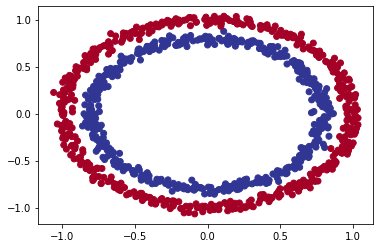

In [9]:
# Visualize with the plot
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Input and output shapes

In [10]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [11]:
# How many samples we're working with
len(X), len(y)

(1000, 1000)

In [12]:
# View the first examples of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate..

In [13]:
import tensorflow as tf

In [14]:
X_train, X_test, y_train, y_test = X[:800], X[800:], y[:800], y[800:]

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(7, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history = model.fit(X_train, 
                    y_train, 
                    epochs=200)

In [28]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0701 - accuracy: 0.9950


[0.0700966939330101, 0.9950000047683716]

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might want to add mroe layres or increase the number of hidden units within a layer
2. Compiling a model - here we might choose a different optimization function such as Adam instead of SGD
3. Fitting a model - perhaps we might fit our model for more epochs

In [38]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_2.fit(tf.constant(X, dtype=tf.float32), 
            tf.constant(y, dtype=tf.float32),
            epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.6933 - accuracy: 0.5090
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6884 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6845 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6804 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6739 - accuracy: 0.5230
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6634 - accuracy: 0.5310
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6531 - accuracy: 0.8710
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6385 - accuracy: 0.7140
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6203 - accuracy: 0.8250
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5976 - accuracy: 0.8510
Epoch 11/

To visualize our model's predictions, let's create a function `plot_decision_boundary()` this function will:

* Take in a trained model, features and labels
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [36]:
import numpy as np
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  """

  # define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X value (we're going to make predictions on these
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multiclass
  if len(y_pred[0]) > 1:
    print("doing multi-class classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 2s 4ms/step
doing binary classification


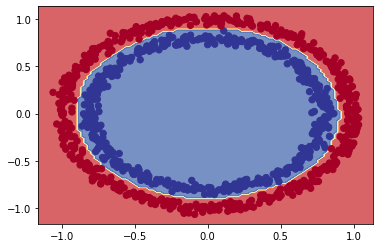

In [40]:
# Check out the predictions our model is making
plot_decision_boundary(model_2, X, y)

## The missing piece - non linearity

In [41]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="linear")
])

# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 8ms/step - loss: 4.3189 - accuracy: 0.4640
Epoch 2/100
32/32 [==============================] - 0s 8ms/step - loss: 4.2287 - accuracy: 0.4660
Epoch 3/100
32/32 [==============================] - 0s 7ms/step - loss: 4.2182 - accuracy: 0.4650
Epoch 4/100
32/32 [==============================] - 0s 10ms/step - loss: 4.1839 - accuracy: 0.4670
Epoch 5/100
32/32 [==============================] - 0s 8ms/step - loss: 4.1463 - accuracy: 0.4670
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 4.1013 - accuracy: 0.4670
Epoch 7/100
32/32 [==============================] - 0s 7ms/step - loss: 4.0700 - accuracy: 0.4660
Epoch 8/100
32/32 [==============================] - 0s 8ms/step - loss: 4.0501 - accuracy: 0.4660
Epoch 9/100
32/32 [==============================] - 0s 7ms/step - loss: 4.0349 - accuracy: 0.4660
Epoch 10/100
32/32 [==============================] - 0s 7ms/step - loss: 4.0283 - accuracy: 0.4660
Epoch 11

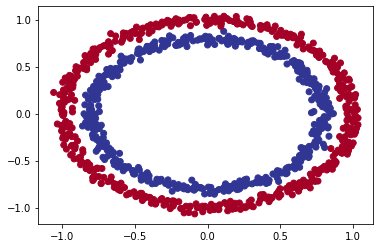

In [42]:
# Check out data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 2s 6ms/step
doing binary classification


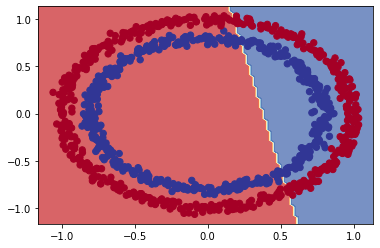

In [43]:
# Check the decision boundary for our model
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

Let's build our first neural network with a non linear activation function

In [44]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_5.fit(tf.constant(X, dtype=tf.float32),
            tf.constant(y, dtype=tf.float32),
            epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 6.0355 - accuracy: 0.4840
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 6.0151 - accuracy: 0.4840
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 6.0193 - accuracy: 0.4860
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 6.0191 - accuracy: 0.4860
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 6.0187 - accuracy: 0.4860
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 6.0183 - accuracy: 0.4860
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 6.0179 - accuracy: 0.4860
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 6.0175 - accuracy: 0.4860
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 6.0171 - accuracy: 0.4860
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 6.0087 - accuracy: 0.4860
Epoch 11/

In [46]:
#  Time to replicate the multi-layer neural network from tensorflow playground in code

# Set random seed
tf.random.set_seed(42)

# Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="relu")
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history = model_6.fit(tf.constant(X, dtype=tf.float32),
                      tf.constant(y, dtype=tf.float32),
                      epochs=100)

Epoch 1/100
32/32 [==============================] - 4s 5ms/step - loss: 2.9448 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 1.0675 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.9456 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8824 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8395 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.8095 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7892 - accuracy: 0.4790
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7747 - accuracy: 0.4190
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7645 - accuracy: 0.4220
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7564 - accuracy: 0.4410
Epoch 11/

313/313 [==============================] - 3s 8ms/step
doing binary classification


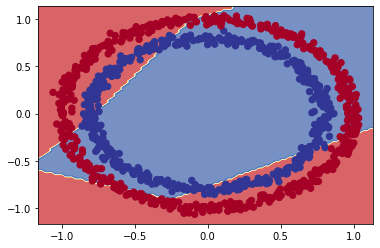

In [48]:
plot_decision_boundary(model_6, X, y)

In [55]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(9, activation="relu"),
    tf.keras.layers.Dense(7, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# Create callback
callback = tf.keras.callbacks.EarlyStopping(monitor="accuracy", patience=10)

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history = model_7.fit(tf.constant(X, dtype=tf.float32),
                      tf.constant(y, dtype=tf.float32),
                      callbacks=[callback],
                      epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.6944 - accuracy: 0.5040
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.5160
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6897 - accuracy: 0.5070
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6883 - accuracy: 0.5140
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.5110
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6855 - accuracy: 0.5140
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6835 - accuracy: 0.5160
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6812 - accuracy: 0.5220
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6784 - accuracy: 0.5210
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6756 - accuracy: 0.5200
Epoch 11/

313/313 [==============================] - 1s 2ms/step
doing binary classification


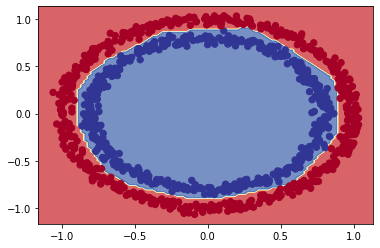

In [56]:
plot_decision_boundary(model_7, X, y)

In [57]:
# Evaluate our model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 5ms/step - loss: 0.0186 - accuracy: 1.0000


[0.018613623455166817, 1.0]

Now we've discussed the concept of linear and non-linear functions, let's see them in action

In [58]:
# Create a toy tensor (simnilar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

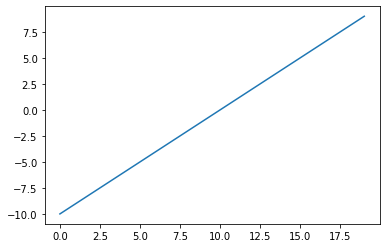

In [59]:
# Visualize our toy tensor
plt.plot(A);

In [64]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

In [67]:
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

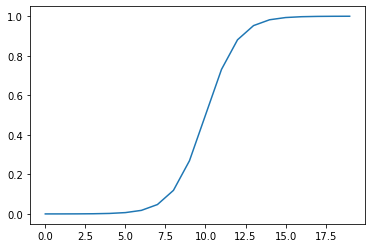

In [68]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [73]:
# Replicate relu activation function
def relu(x):
  return tf.maximum(0, x)

In [74]:
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

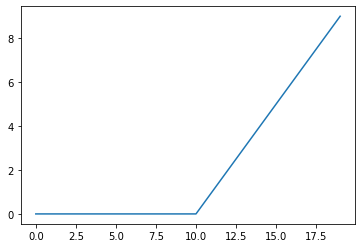

In [75]:
# Lets plot A passed through relu function
plt.plot(relu(A));

In [76]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

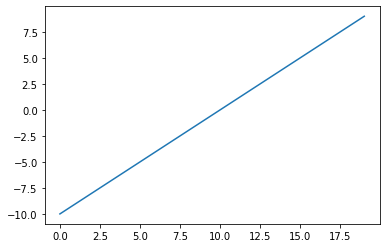

In [77]:
plt.plot(tf.keras.activations.linear(A));

In [78]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification problem

So far we've been training and testing on teh same dataset

However, in machine learning this is basically a sin

So let's create a training and test set

In [81]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [87]:
# Let's recreate a model to fit on the training data and evaluate on the test set

# Set random seed
tf.random.set_seed(42)

# Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(9, activation="relu"),
    tf.keras.layers.Dense(7, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# Create callback
callback = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=10)

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history = model_8.fit(tf.constant(X_train, dtype=tf.float32),
                      tf.constant(y_train, dtype=tf.float32),
                      callbacks=[callback],
                      epochs=100)

Epoch 1/100
25/25 [==============================] - 2s 4ms/step - loss: 0.6945 - accuracy: 0.4837
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6858 - accuracy: 0.5412
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6821 - accuracy: 0.5312
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6790 - accuracy: 0.5337
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6765 - accuracy: 0.6100
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6738 - accuracy: 0.5200
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6694 - accuracy: 0.5863
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6669 - accuracy: 0.6275
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6634 - accuracy: 0.6225
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6597 - accuracy: 0.6350
Epoch 11/

In [88]:
# Evaluate on training data
model_8.evaluate(X_train, y_train)

25/25 [==============================] - 0s 2ms/step - loss: 0.0201 - accuracy: 0.9962


[0.02014540135860443, 0.9962499737739563]

In [89]:
# Evaluate on test data
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0169 - accuracy: 1.0000


[0.016898363828659058, 1.0]

313/313 [==============================] - 2s 6ms/step
doing binary classification


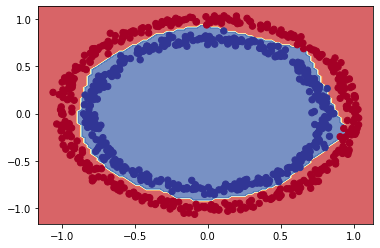

In [91]:
# Plot the decision boundaries for training set
plot_decision_boundary(model_8, 
                       X_train,
                       y_train)

313/313 [==============================] - 1s 2ms/step
doing binary classification


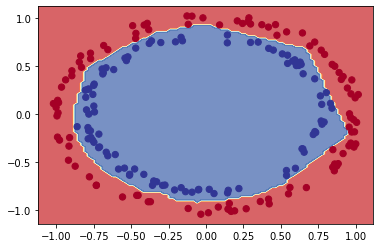

In [92]:
# Plot the decision boundaries for test set
plot_decision_boundary(model_8, 
                       X_test,
                       y_test)

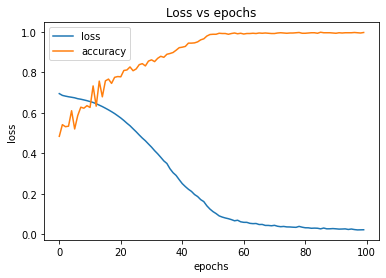

In [97]:
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss vs epochs")
plt.legend();

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality you can add to your model *while* its training
* Another model (we could use the same one as above, but we're practicing building models here.
* A modified loss curves plot

In [105]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(9, activation="relu"),
    tf.keras.layers.Dense(7, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch / 20))
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=10)

# Fit the model
history = model_9.fit(tf.constant(X_train, dtype=tf.float32),
                      tf.constant(y_train, dtype=tf.float32),
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 2s 2ms/step - loss: 0.6923 - accuracy: 0.5125 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5100 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5213 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5188 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5188 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6916 - accuracy: 0.5150 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.5200 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.5175 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

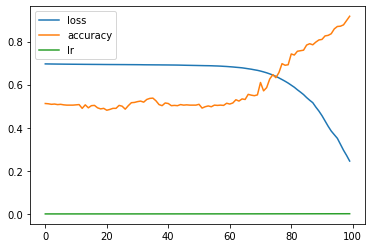

In [100]:
pd.DataFrame(history.history).plot()
plt.legend()

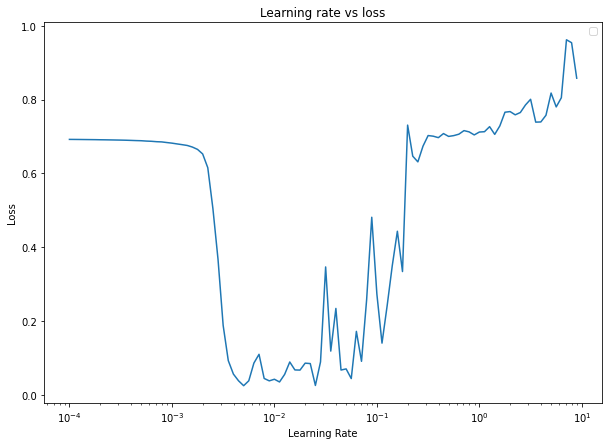

In [106]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/ 20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs loss")
plt.legend();